In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
data_files = glob.glob("states*.csv")
data = []
for filename in data_files:
  file_append = pd.read_csv(filename)
  data.append(file_append)

In [6]:
us_census = pd.concat(data)

print(us_census.head())
print(us_census.dtypes)

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: objec

In [10]:
us_census["Income"] = us_census.Income.str.replace("$", "", regex=False).str.replace(",", "", regex=False)
us_census["Income"] = pd.to_numeric(us_census.Income)

gender_pop_split = us_census.GenderPop.str.split("_")
us_census["Female_population"] = gender_pop_split.str.get(1)
us_census["Male_population"] = gender_pop_split.str.get(0)

In [12]:
us_census["Female_population"] = us_census.Female_population.str.replace("F", "")
us_census["Male_population"] = us_census.Male_population.str.replace("M", "")
us_census.Female_population = pd.to_numeric(us_census.Female_population)
us_census.Male_population = pd.to_numeric(us_census.Female_population)
print(us_census.head())


   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop  Female_population  Male_population  
0   0.03%  43296.36    2341093M_2489527F          2489527.0        2489527.0  
1   1.06%  70354.74      384160M_349215F           349215.0         349215.0  
2   0.17%  54207.82    3299088M_3342840F          3342840.0        3342840.0  
3   0.15%  41935.63    1451913M_1506295F          1506295.0        1506295.0  
4   0.35%  67264.78  19087135M_19334329F         19334329.0       19334329.0  


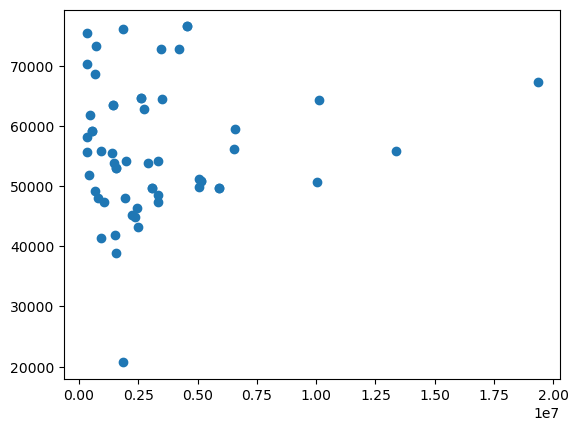

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Female_population, dtype: float64


In [14]:
plt.scatter(us_census.Female_population, us_census.Income)
plt.show()
print(us_census.Female_population)